In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
from src.V1_reconst import reconstruct, generate_Y

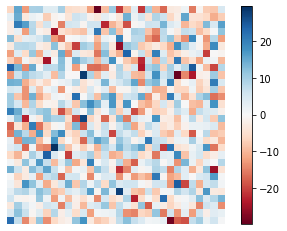

In [77]:
W = np.random.randn(30,30) * 10

ax = plt.imshow(W, 'RdBu')
plt.axis('off')
plt.colorbar(ax)

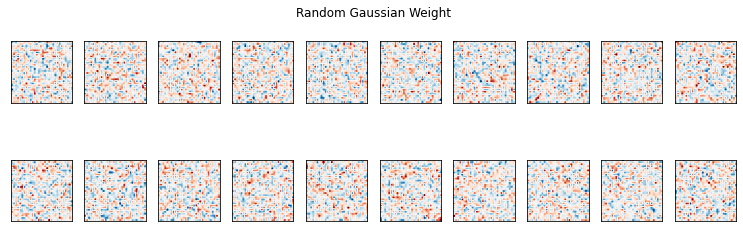

In [78]:
# 2. Plot those V1 weights

fig = plt.figure(figsize = (13, 4))
plt.title('Random Gaussian Weight')
plt.axis('off')
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1)
    cell_rf = np.random.randn(30, 30)
#     cell_rf = cell_rf.reshape(dim)
    plt.imshow(cell_rf, cmap="RdBu")
    plt.clim([-3, 3])
    axes = plt.gca()
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
#     plt.axis('off')

In [103]:
def gaussian_W(num_cell, img_dim):
    n, m = img_dim
    W = np.random.randn(num_cell, n, m)
    return W

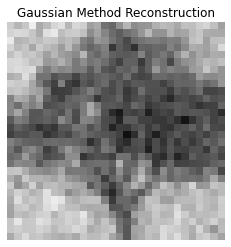

error is 19.42949133374768


In [125]:
img = Image.open("image/tree_part1.jpg")
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)

img_dim = img_arr.shape
n, m = img_dim
num_cell = 500
W = gaussian_W(num_cell, img_dim)
y = generate_Y(W, img_arr)
W_rev = W.reshape(num_cell, n, m)
theta, reconst, s = reconstruct(W_rev, y, 1)
plt.imshow(reconst, 'gray')
plt.clim(0, 255)
plt.axis('off')
plt.title('Gaussian Method Reconstruction')
# plt.savefig('result/gaussian/gaussian_reconst.png', dpi = 300)
plt.show()
error = np.linalg.norm(img_arr - reconst, 'fro') / np.sqrt(n*m)
print("error is {error}".format(error = error))

In [38]:
reconst

array([[141.33735128, 246.54613039, 123.57072387, 169.08061524,
        260.95164581, 248.16826741, 276.68114302, 157.42124078,
        129.71800047, 204.83235782, 225.30414745, 220.71809639,
        131.35901164,  66.06584605, 144.47724708, 157.85138799,
         50.4142474 , 177.98605981, 152.01255309, 188.95073955,
         53.95912282,  24.22910876, 223.38859861, 168.05786296,
        165.13245551, 180.9812205 , 220.67838082, 188.05608412,
        199.31218642, 173.3581019 ],
       [175.59119001, 200.97703399, 130.63989733, 174.24932706,
        265.50973309, 235.52939958, 270.09291454, 199.26748889,
        109.82883745, 183.03184443, 261.36117276, 190.33170567,
        200.56509104,  72.66777113, 124.52107425,  78.81042845,
          2.76096022, 131.9813095 , 121.70731536, 190.13913334,
         54.92882613,  -3.60081621, 138.04889386, 130.1018179 ,
        137.86146084, 161.47963011, 221.28549745, 189.50141643,
        158.62444246, 191.43635318],
       [164.76552171, 220.3139

In [13]:
img_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,